In [1]:
import tensorflow.compat.v1 as tf1
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "3"
config = tf1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
session = tf1.Session(config=config)

2024-05-31 20:46:45.686511: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-31 20:46:46.496440: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-31 20:46:49.290877: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-05-31 20:46:49.291086: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

- MonsoonIntensity: 몬순 강도
- TopographyDrainage: 지형 배수
- RiverManagement: 강 관리
- Deforestation: 산림 벌채
- Urbanization: 도시화
- ClimateChange: 기후 변화
- DamsQuality: 댐의 품질
- Siltation: 퇴적물 침적
- AgriculturalPractices: 농업 관행
- Encroachments: 침범
- IneffectiveDisasterPreparedness: 비효율적인 재해 대비
- DrainageSystems: 배수 시스템
- CoastalVulnerability: 해안 취약성
- Landslides: 산사태
- Watersheds: 유역
- DeterioratingInfrastructure: 악화되는 인프라
- PopulationScore: 인구 점수
- WetlandLoss: 습지 손실
- InadequatePlanning: 불충분한 계획
- PoliticalFactors: 정치적 요인

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = '/home/a202192006/kaggle(캐글)/홍수 예측/data/'

train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
submit = pd.read_csv(path+'sample_submission.csv')

In [4]:
def data_inform(df, df_name):
    print(f"--- {df_name} 데이터 프레임 정보 ---")
    print("데이터 타입 정보:")
    print(df.dtypes)
    print("\n결측값 개수:")
    print(df.isnull().sum())
    print("\n고윳값 개수:")
    print(df.nunique())
    print("\n실제값 예시:")
    print(df.head())
    print("\n데이터 종류:")
    print(df_name)

In [5]:
data_inform(train,"학습데이터")

--- 학습데이터 데이터 프레임 정보 ---
데이터 타입 정보:
id                                   int64
MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object

결측값

In [6]:
data_inform(test,"테스트데이터")

--- 테스트데이터 데이터 프레임 정보 ---
데이터 타입 정보:
id                                 int64
MonsoonIntensity                   int64
TopographyDrainage                 int64
RiverManagement                    int64
Deforestation                      int64
Urbanization                       int64
ClimateChange                      int64
DamsQuality                        int64
Siltation                          int64
AgriculturalPractices              int64
Encroachments                      int64
IneffectiveDisasterPreparedness    int64
DrainageSystems                    int64
CoastalVulnerability               int64
Landslides                         int64
Watersheds                         int64
DeterioratingInfrastructure        int64
PopulationScore                    int64
WetlandLoss                        int64
InadequatePlanning                 int64
PoliticalFactors                   int64
dtype: object

결측값 개수:
id                                 0
MonsoonIntensity                   0
Topog

# FloodProbability 에 대한 상관계수 확인

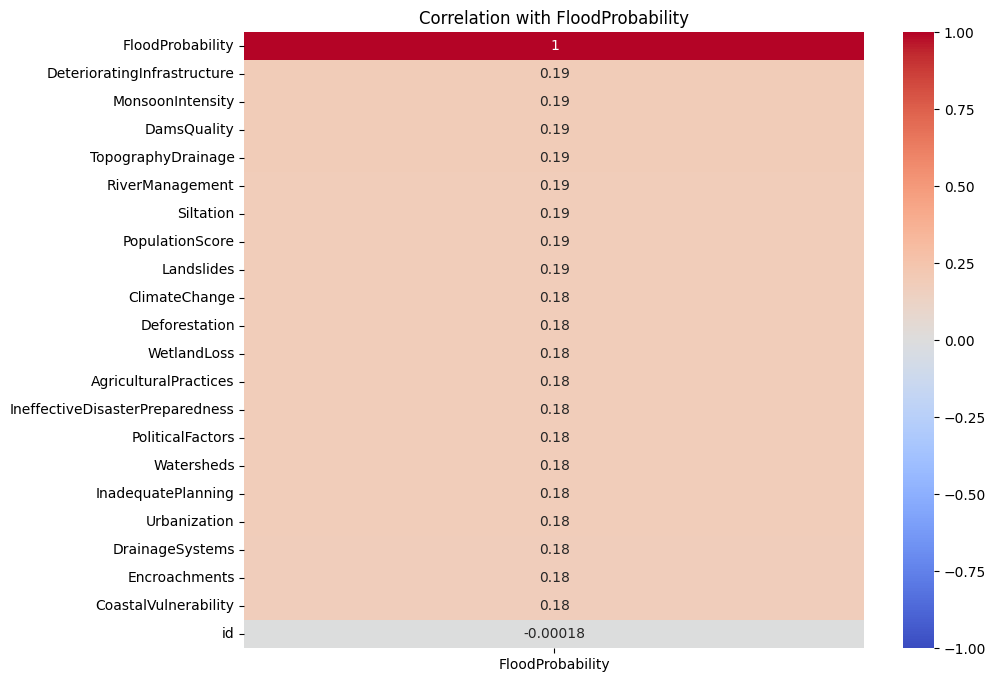

In [7]:
# FloodProbability와 다른 변수들 간의 상관계수만 추출
corr_matrix = train.corr()
flood_corr = corr_matrix[['FloodProbability']].sort_values(by='FloodProbability', ascending=False)

# 상관계수
plt.figure(figsize=(10, 8))
sns.heatmap(flood_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with FloodProbability')
plt.show()

In [8]:
y_train = train['FloodProbability']

X_train = train.drop(['id', 'FloodProbability'], axis=1)

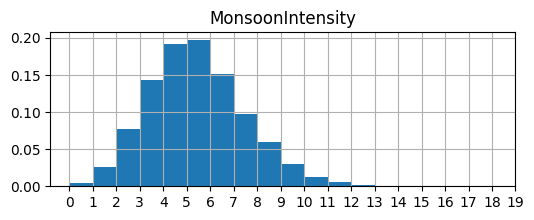

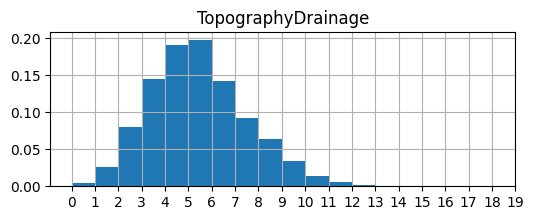

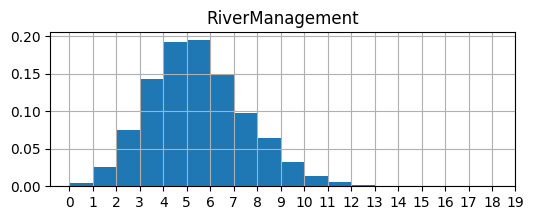

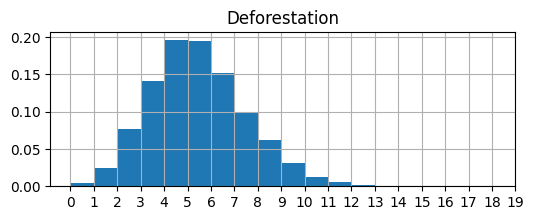

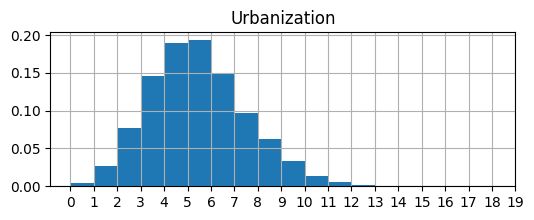

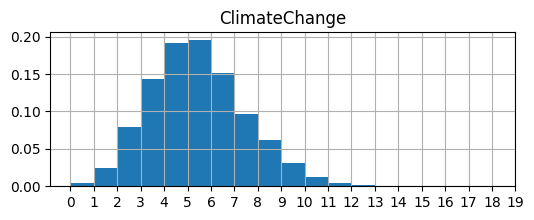

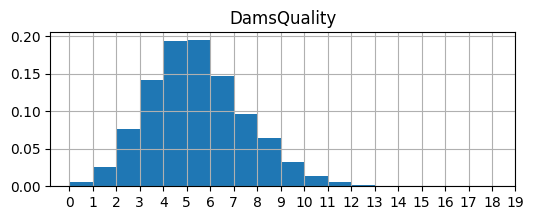

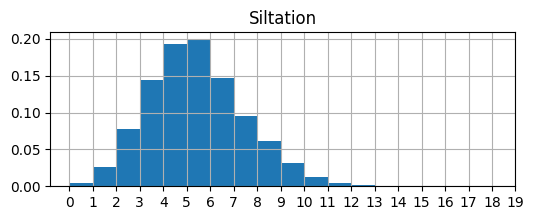

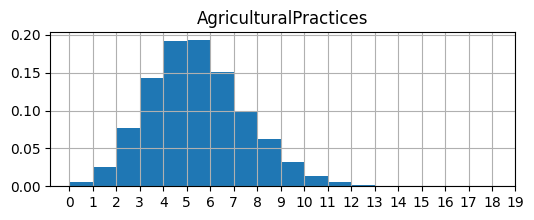

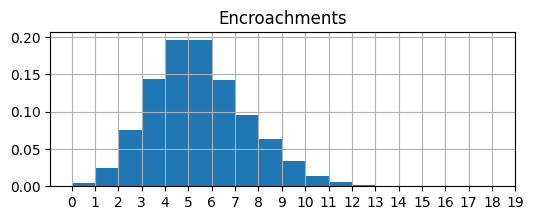

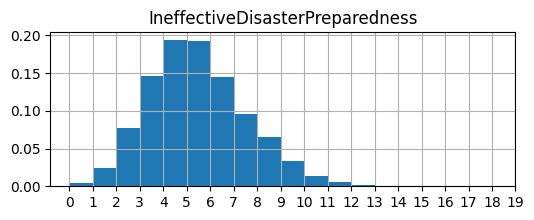

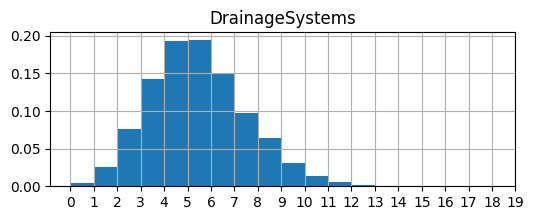

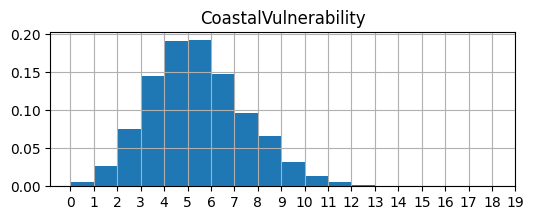

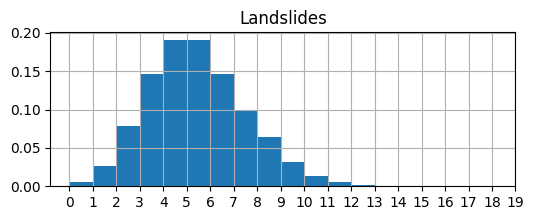

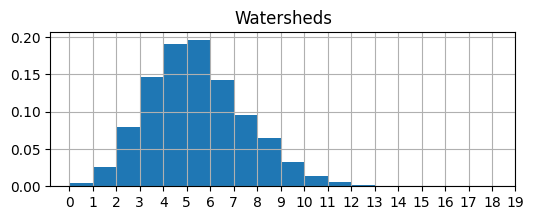

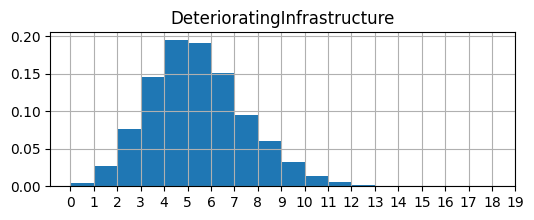

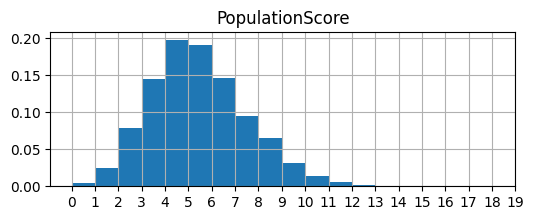

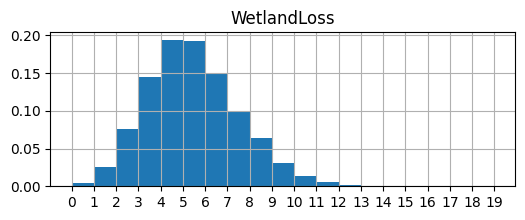

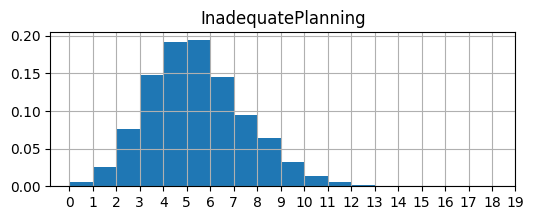

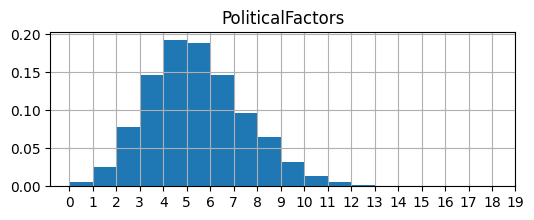

In [9]:
for col in X_train:
    fig, ax = plt.subplots(figsize=(6,2))
    max_val = round(train[col].max()) + 1
    train[col].hist(density=True,bins = np.arange(0,max_val,1), ax=ax)
    plt.xticks(np.arange(0,20,1))
    plt.title(col)
    plt.show

In [10]:
round(X_train.describe(), 2)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00,1117957.00
mean,4.92,4.93,4.96,4.94,4.94,4.93,4.96,4.93,4.94,4.95,4.95,4.95,4.95,4.93,4.93,4.93,4.93,4.95,4.94,4.94
std,2.06,2.09,2.07,2.05,2.08,2.06,2.08,2.07,2.07,2.08,2.08,2.07,2.09,2.08,2.08,2.06,2.07,2.07,2.08,2.09
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,3.00,4.00,4.00,3.00,3.00,4.00,3.00,3.00,4.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00
50%,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
75%,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00
max,16.00,18.00,16.00,17.00,17.00,17.00,16.00,16.00,16.00,18.00,16.00,17.00,17.00,16.00,16.00,17.00,18.00,19.00,16.00,16.00


In [11]:
round(test.describe(), 2)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,745305.00,745305.00,745305.00,745305.00,745305.00,745305.00,745305.00,745305.00,745305.00,745305.00,...,745305.00,745305.00,745305.00,745305.00,745305.00,745305.00,745305.00,745305.00,745305.00,745305.00
mean,1490609.00,4.92,4.93,4.96,4.95,4.94,4.93,4.96,4.93,4.95,...,4.95,4.94,4.96,4.93,4.93,4.93,4.93,4.95,4.94,4.94
std,215151.17,2.06,2.09,2.07,2.05,2.08,2.06,2.09,2.07,2.07,...,2.08,2.07,2.09,2.08,2.08,2.07,2.07,2.07,2.08,2.09
min,1117957.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1304283.00,3.00,3.00,4.00,4.00,3.00,3.00,4.00,3.00,3.00,...,3.00,4.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00
50%,1490609.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
75%,1676935.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,...,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00
max,1863261.00,16.00,17.00,16.00,17.00,17.00,17.00,16.00,16.00,16.00,...,16.00,17.00,17.00,16.00,16.00,17.00,19.00,22.00,16.00,16.00


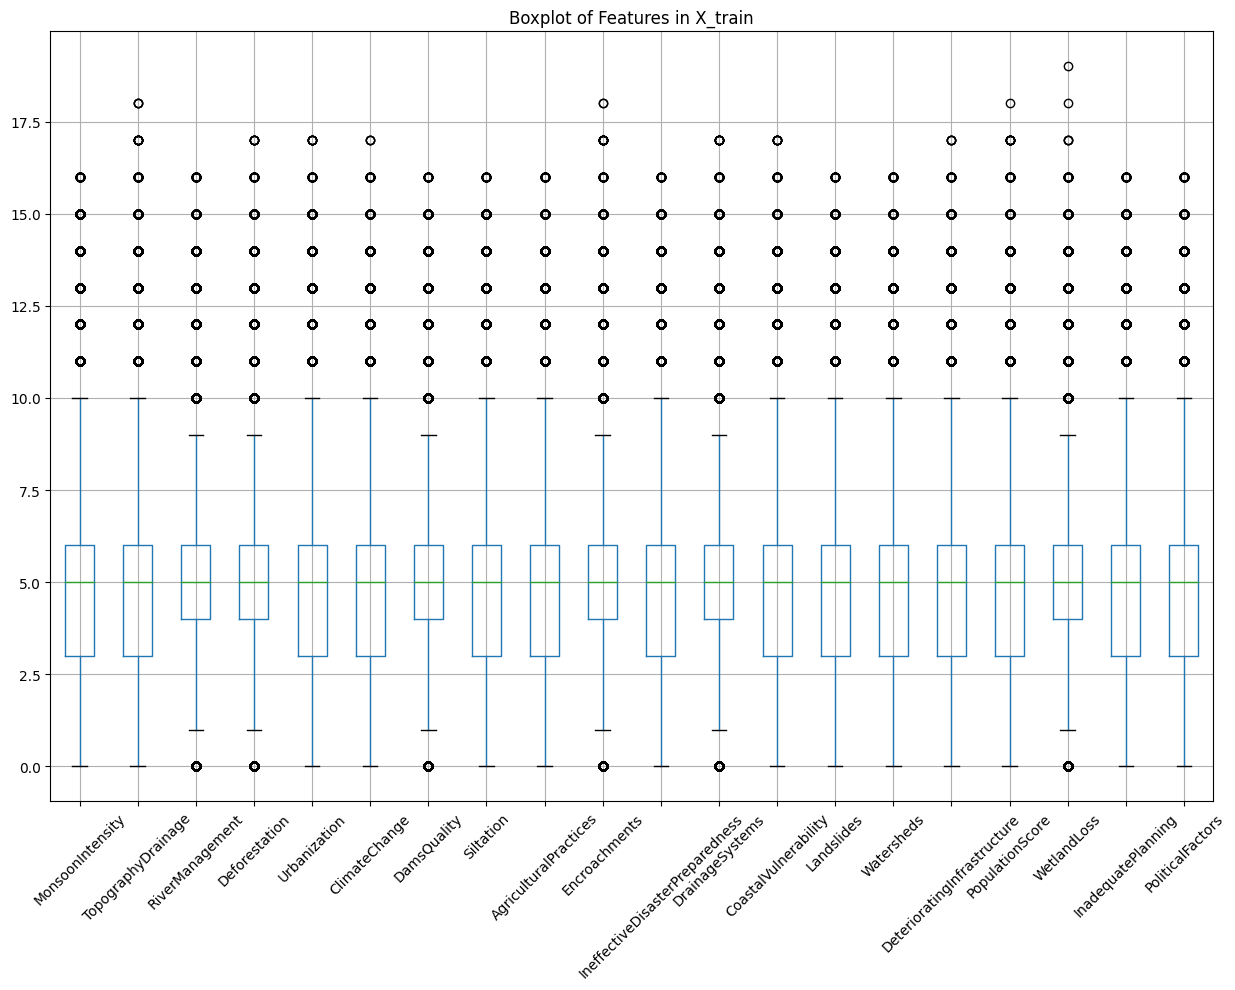

In [12]:
X_train.boxplot(figsize=(15, 10))
plt.title('Boxplot of Features in X_train')
plt.xticks(rotation=45)  
plt.show()

In [13]:
test = test.drop(['id'], axis=1)

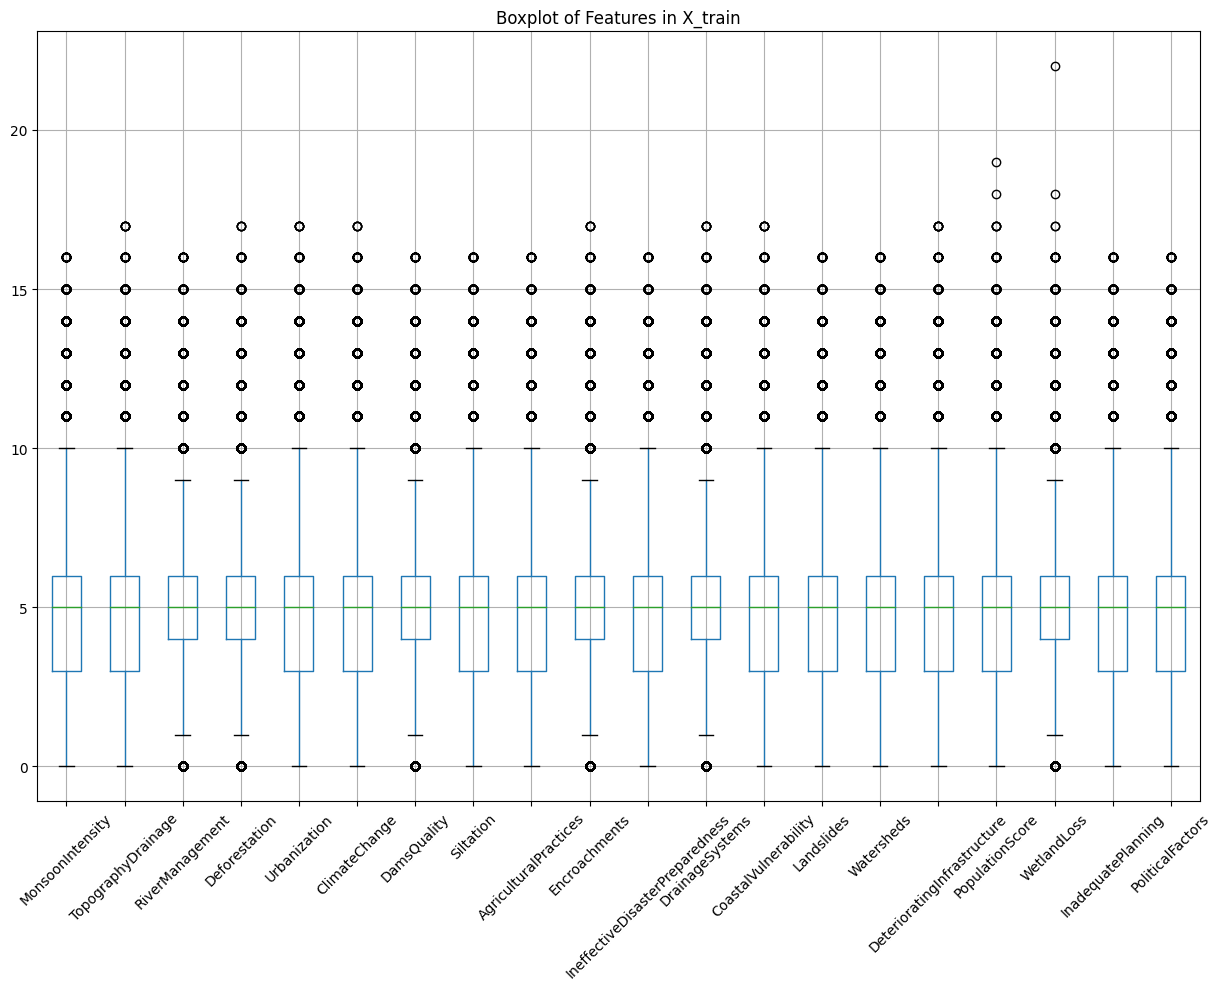

In [14]:
test.boxplot(figsize=(15, 10))
plt.title('Boxplot of Features in X_train')
plt.xticks(rotation=45)  
plt.show()

In [15]:
from scipy.stats import iqr

for col in X_train:
    col_iqr = iqr(train[col])
    Q1, Q3 = np.quantile(train[col], [0.25, 0.75])
    
    # Convert outliers to np.nan
    train.loc[train[col] < (Q1 - 1.5*col_iqr), col] = np.nan
    train.loc[train[col] > (Q3 + 1.5*col_iqr), col] = np.nan 

In [16]:
train.isna().sum()/train.shape[0]

id                                 0.000000
MonsoonIntensity                   0.008269
TopographyDrainage                 0.008565
RiverManagement                    0.026492
Deforestation                      0.025256
Urbanization                       0.008215
ClimateChange                      0.007784
DamsQuality                        0.027816
Siltation                          0.008121
AgriculturalPractices              0.008056
Encroachments                      0.027855
IneffectiveDisasterPreparedness    0.008001
DrainageSystems                    0.026888
CoastalVulnerability               0.009132
Landslides                         0.007930
Watersheds                         0.008270
DeterioratingInfrastructure        0.008024
PopulationScore                    0.008310
WetlandLoss                        0.026387
InadequatePlanning                 0.008318
PoliticalFactors                   0.008683
FloodProbability                   0.000000
dtype: float64

In [17]:
train.dropna(how='any', inplace=True)

In [18]:
train

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5.0,8.0,5.0,8.0,6.0,4.0,4.0,3.0,3.0,...,5.0,3.0,3.0,5.0,4.0,7.0,5.0,7.0,3.0,0.445
1,1,6.0,7.0,4.0,4.0,8.0,8.0,3.0,5.0,4.0,...,7.0,2.0,0.0,3.0,5.0,3.0,3.0,4.0,3.0,0.450
2,2,6.0,5.0,6.0,7.0,3.0,7.0,1.0,5.0,4.0,...,7.0,3.0,7.0,5.0,6.0,8.0,2.0,3.0,3.0,0.530
3,3,3.0,4.0,6.0,5.0,4.0,8.0,4.0,7.0,6.0,...,2.0,4.0,7.0,4.0,4.0,6.0,5.0,7.0,5.0,0.535
4,4,5.0,3.0,2.0,6.0,4.0,4.0,3.0,3.0,3.0,...,2.0,2.0,6.0,6.0,4.0,1.0,2.0,3.0,5.0,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117951,1117951,6.0,4.0,8.0,4.0,4.0,3.0,3.0,4.0,10.0,...,5.0,3.0,4.0,2.0,10.0,3.0,6.0,4.0,5.0,0.495
1117953,1117953,2.0,2.0,4.0,3.0,9.0,5.0,8.0,1.0,3.0,...,9.0,4.0,4.0,3.0,7.0,4.0,9.0,4.0,5.0,0.480
1117954,1117954,7.0,3.0,9.0,4.0,6.0,5.0,9.0,1.0,3.0,...,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,4.0,0.485
1117955,1117955,7.0,3.0,3.0,7.0,5.0,2.0,3.0,4.0,6.0,...,6.0,8.0,5.0,3.0,4.0,6.0,7.0,6.0,4.0,0.495


In [19]:
y = train['FloodProbability']
X = train.drop(['id', 'FloodProbability'],axis=1)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)
test[test.columns] = scaler.transform(test)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =  987)

In [21]:
from sklearn.linear_model import BayesianRidge, ElasticNetCV, LinearRegression, LassoCV, RidgeCV, SGDRegressor, Ridge, Lasso, ElasticNet, Lars, OrthogonalMatchingPursuit, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor, TheilSenRegressor


In [22]:
regressors = [
    ('bayesian ridge', BayesianRidge()),
    ('elastic net', ElasticNetCV()),
    ('linear_reg', LinearRegression()),
    ('lasso', LassoCV()),
    ('ridge', RidgeCV()),
    ('sgd', SGDRegressor()),
    ('ridge', Ridge()),
    ('lasso', Lasso()),
    ('elastic net', ElasticNet()),
    ('lars', Lars()),
    ('orthogonal matching pursuit', OrthogonalMatchingPursuit()),
    ('huber', HuberRegressor()),
    ('passive aggressive', PassiveAggressiveRegressor()),
    ('ransac', RANSACRegressor()),
    ('theil sen', TheilSenRegressor())
]


In [23]:
from tqdm import tqdm
from sklearn.metrics import r2_score

evals = {}

# tqdm을 사용하여 진행 상황을 표시하는 for 루프
for clf, model in tqdm(regressors, desc="Fitting models"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    evals[clf] = score


Fitting models: 100%|██████████| 15/15 [31:22<00:00, 125.50s/it]


,model,r2_score
1,elastic net,-2.151512e-07
3,lasso,-2.151512e-07
7,orthogonal matching pursuit,7.651957e-02
9,passive aggressive,6.179730e-01
10,ransac,7.112384e-01
8,huber,8.294230e-01
11,theil sen,8.329469e-01
5,sgd,8.336317e-01
2,linear_reg,8.338033e-01
6,lars,8.338033e-01


In [24]:
evals_df = pd.DataFrame({'model':evals.keys(),'r2_score':evals.values()})
evals_df.sort_values('r2_score', inplace = True)
evals_df

,model,r2_score
1,elastic net,-2.151512e-07
3,lasso,-2.151512e-07
7,orthogonal matching pursuit,7.651957e-02
9,passive aggressive,6.179730e-01
10,ransac,7.112384e-01
8,huber,8.294230e-01
11,theil sen,8.329469e-01
5,sgd,8.336317e-01
2,linear_reg,8.338033e-01
6,lars,8.338033e-01


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import BayesianRidge, ElasticNetCV, LinearRegression, LassoCV, RidgeCV
from tqdm import tqdm

# Define the models
models = {
    'bayesian_ridge': BayesianRidge(),
    'elastic_net': ElasticNetCV(cv=5),
    'linear_reg': LinearRegression(),
    'lasso': LassoCV(cv=5),
    'ridge': RidgeCV(cv=5)
}

# Define the parameter grids for each model
param_grids = {
    'bayesian_ridge': {
        'alpha_1': [1e-6, 1e-5],
        'alpha_2': [1e-6, 1e-4],
        'lambda_1': [1e-6, 1e-5],
        'lambda_2': [1e-6, 1e-5]
    },
    'elastic_net': {
    },
    'linear_reg': {
        'fit_intercept': [True, False]
    },
    'lasso': {
    },
    'ridge': {
        'alphas': [(0.1, 1.0, 10.0)]
    }
}

# Initialize the GridSearchCV for each model
grid_searches = {name: GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
                 for name, (model, param_grid) in zip(models.keys(), zip(models.values(), param_grids.values()))}


best_estimators = {}


for name, gs in tqdm(grid_searches.items(), desc="GridSearch Progress"):
    print(f"Running GridSearchCV for {name}")
    gs.fit(X, y)
    print(f"Best parameters for {name}: {gs.best_params_}")
    print(f"Best score for {name}: {gs.best_score_}")
    best_estimators[name] = gs.best_estimator_


In [ ]:
# Print the best estimators
for name, estimator in best_estimators.items():
    print(f"Best estimator for {name}: {estimator}")

In [29]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import BayesianRidge, Ridge, Lars, LinearRegression, SGDRegressor, TheilSenRegressor

voting_regressor = VotingRegressor(estimators=[
    ('bayesian ridge', BayesianRidge()),
    ('ridge', Ridge()),
    ('lars', Lars()),
    ('linear_reg', LinearRegression()),
    ('sgd', SGDRegressor()),
    ('theil sen', TheilSenRegressor())
])

# Fit the VotingRegressor on the dataset
voting_regressor.fit(X, y)
y_preds = voting_regressor.predict(test)


In [35]:
submit['FloodProbability'] == y_preds

0         False
1         False
2         False
3         False
4         False
          ...  
745300    False
745301    False
745302    False
745303    False
745304    False
Name: FloodProbability, Length: 745305, dtype: bool

In [37]:
submit['FloodProbability']= y_preds
submit.to_csv('FloodProbability_v1.csv',index = False, quoting = 3)
submit.head()

,id,FloodProbability
0,1117957,0.574136
1,1117958,0.454843
2,1117959,0.453938
3,1117960,0.465904
4,1117961,0.466467


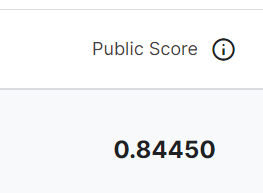

In [42]:
import tensorflow as tf
from sklearn.metrics import fbeta_score


# 모델 구축
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # 회귀 모델이므로 활성화 함수는 필요하지 않습니다.
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='mean_squared_error')  # 회귀 문제이므로 평균 제곱 오차를 손실 함수로 사용합니다.

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)



2024-05-31 22:15:15.269389: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20169 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:af:00.0, compute capability: 8.0
/home/a202192006/.local/lib/python3.8/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/10


2024-05-31 22:15:22.487333: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


15921/15921 [==============================] - 202s 12ms/step - loss: 0.0011 - val_loss: 3.9650e-04
Epoch 2/10
15921/15921 [==============================] - 190s 12ms/step - loss: 3.8040e-04 - val_loss: 3.6990e-04
Epoch 3/10
15921/15921 [==============================] - 192s 12ms/step - loss: 3.7282e-04 - val_loss: 3.7187e-04
Epoch 4/10
15921/15921 [==============================] - 165s 10ms/step - loss: 3.7092e-04 - val_loss: 3.6359e-04
Epoch 5/10
15921/15921 [==============================] - 106s 7ms/step - loss: 3.6957e-04 - val_loss: 3.6731e-04
Epoch 6/10
15921/15921 [==============================] - 64s 4ms/step - loss: 3.6798e-04 - val_loss: 3.6169e-04
Epoch 7/10
15921/15921 [==============================] - 64s 4ms/step - loss: 3.6724e-04 - val_loss: 3.6081e-04
Epoch 8/10
15921/15921 [==============================] - 62s 4ms/step - loss: 3.6665e-04 - val_loss: 3.7956e-04
Epoch 9/10
15921/15921 [==============================] - 145s 9ms/step - loss: 3.6626e-04 - val_loss:

In [46]:
from sklearn.metrics import r2_score

# 모델 평가
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R2 Score:", r2)


6634/6634 [==============================] - 31s 5ms/step
R2 Score: 0.8530577911851375


In [47]:
y_pred_v2 = model.predict(test)

23291/23291 [==============================] - 112s 5ms/step


In [49]:
submit['FloodProbability']= y_pred_v2
submit.to_csv('FloodProbability_v2.csv',index = False, quoting = 3)
submit.head()

,id,FloodProbability
0,1117957,0.574847
1,1117958,0.453887
2,1117959,0.456672
3,1117960,0.471630
4,1117961,0.472560


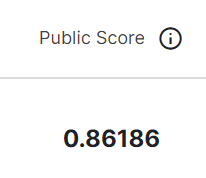

# 여러 Optimizer 사용

In [51]:
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm  # tqdm 임포트

# 최적화 알고리즘 목록
optimizers = ['SGD', 'Momentum', 'NAG', 'Nadam', 'Adam', 'RMSProp']


results_r2 = {}


for optimizer in tqdm(optimizers, desc="Optimizers"): 
    print("Optimizer:", optimizer)
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    
    results_r2[optimizer] = r2

print("\nR2 Score:")
for optimizer, r2 in results_r2.items():
    print(optimizer, ":", r2)


Optimizers:   0%|          | 0/8 [00:00<?, ?it/s]

Optimizer: SGD


/home/a202192006/.local/lib/python3.8/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


6634/6634 [==============================] - 32s 5ms/step


Optimizers:  12%|█▎        | 1/8 [2:49:32<19:46:44, 10172.04s/it]

Optimizer: Momentum


ValueError: Unknown optimizer: 'Momentum'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [59]:
import pandas as pd

results = {
    'Optimizer': ['SGD', 'Momentum', 'Adam', 'NAG', 'Nadam', 'RMSProp'],
    'R2 Score': [0.778, 0.825, 0.853, 0.813, 0.845, 0.847]
}

df_results = pd.DataFrame(results)


df_results

,Optimizer,R2 Score
0,SGD,0.778
1,Momentum,0.825
2,Adam,0.853
3,NAG,0.813
4,Nadam,0.845
5,RMSProp,0.847


# 최종적으로 딥러닝을 이용한 선형회귀, Adam 옵티마이저를 사용, 0.861 결과가 가장 좋음